## Analysis 4: Analyzing the keywords


In [46]:
import os                            #importng os library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from pylab import *
import numpy as np
import matplotlib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import defaultdict

In [4]:
path=os.chdir("..")                   #Moving back one folder

In [5]:
path=os.getcwd()                          #Checking the path
path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final'

In [6]:
final_path= path+"\\Data\\movie_metadata.csv" #setting up the final path in final_path

In [7]:
df= pd.read_csv(final_path)
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [8]:
%matplotlib inline

In [9]:
df['net']= df['gross']-df['budget']
df['net_percentage']= df['net']/df['budget']
df['net_percentage']= df['net_percentage']*100

In [10]:
df['actors']=df.actor_1_name.astype(str).str.cat(df.actor_2_name.astype(str), sep=',')

In [11]:
df['actors']= df.actors.astype(str).str.cat(df.actor_3_name.astype(str), sep=',')

In [12]:
df_clean = df[['budget', 'genres', 'gross', 'title_year','actors','director_name','imdb_score','net','net_percentage','movie_title','plot_keywords']].dropna()
df_genre = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'gross', 'year', 'actors','director_name','imdb_score','net','net_percentage','movie_title',
                                  'plot_keywords'])

def genreRemap(row):
    global df_genre
    d = {}
    genres = np.array(row['genres'].split('|'))
    n = genres.size
    d['actors']= [row['actors']]*n
    d['plot_keywords']= [row['plot_keywords']]*n
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['year'] = [row['title_year']]*n
    d['director_name']= [row['director_name']]*n
    d['imdb_score']=[row['imdb_score']]*n
    d['net']= [row['net']]*n
    d['net_percentage']= [row['net_percentage']]*n
    d['movie_title']= [row['movie_title']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres[genres != genre])
    df_genre = df_genre.append(pd.DataFrame(d), ignore_index = True)

df_clean.apply(genreRemap, axis = 1)
df_genre['year'] = df_genre['year'].astype(np.int16)
df_genre = df_genre[['genre', 'budget', 'gross', 'year', 'cgenres','actors','director_name','imdb_score','net','net_percentage','movie_title', 'plot_keywords']]

In [13]:
df_clean1 = df[['budget', 'genres', 'gross', 'title_year','actors','director_name','imdb_score','net','net_percentage','movie_title','plot_keywords']].dropna()
df_plot = pd.DataFrame(columns = ['genres', 'budget', 'gross', 'year', 'actors','director_name','imdb_score','net','net_percentage','movie_title',
                                  'plot_keyword','cplotkeyword'])

def plotRemap(row):
    global df_plot
    d = {}
    plot_keywords = np.array(row['plot_keywords'].split('|'))
    n = plot_keywords.size
    d['actors']= [row['actors']]*n
    d['genres']= [row['genres']]*n
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['year'] = [row['title_year']]*n
    d['director_name']= [row['director_name']]*n
    d['imdb_score']=[row['imdb_score']]*n
    d['net']= [row['net']]*n
    d['net_percentage']= [row['net_percentage']]*n
    d['movie_title']= [row['movie_title']]*n
    d['plot_keyword'], d['cplotkeyword'] = [], []

    for plot_keyword in plot_keywords:
        d['plot_keyword'].append(plot_keyword)
        d['cplotkeyword'].append(plot_keywords[plot_keywords != plot_keyword])

    df_plot = df_plot.append(pd.DataFrame(d), ignore_index = True)

df_clean.apply(plotRemap, axis = 1)
df_plot['year'] = df_plot['year'].astype(np.int16)
df_plot = df_plot[['plot_keyword','genres', 'budget','cplotkeyword', 'gross', 'year','actors','director_name','imdb_score','net','net_percentage','movie_title']]

In [88]:
#df_plot.head()


In [15]:
df_plot_count= df_plot.groupby('plot_keyword')['cplotkeyword'].count().reset_index()

In [16]:
df_plot_count_sort= df_plot_count.sort_values(by='cplotkeyword', ascending=False)

In [17]:
df_plot_count_sort20=df_plot_count_sort.head(20)

In [18]:
df_plot_count_sort20.head()

plot_keyword  cplotkeyword
3547         love           155
2434       friend           137
3987       murder           132
1591        death           105
4588       police            93

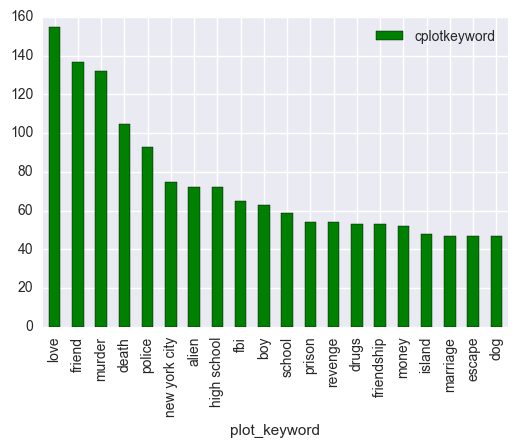

In [19]:
df_plot_count_sort20.plot(x='plot_keyword',y='cplotkeyword',kind='bar', color='green')

In [20]:
color_mask_total=imread(path+'/spectral.jpg')
#image_colors = ImageColorGenerator(color_mask_total)


In [21]:
#color_mask_total

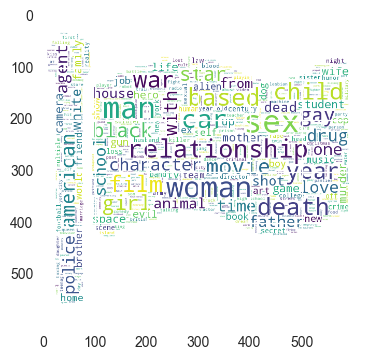

In [22]:
sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text3 = " ".join(str(e) for e in df_plot_count_sort['plot_keyword'].values.tolist()) 
cloud_plot = WordCloud(background_color='white',mask=color_mask_total,max_words=2000,max_font_size=60,stopwords=sWords)
cloud_plot.generate(cut_text3) 
plt.imshow(cloud_plot, interpolation='bilinear')

## Plotting wordcloud for top imdb

In [23]:
df_plot_imdb= df_plot.groupby('plot_keyword')['imdb_score'].agg(['mean',len]).reset_index()

In [24]:
df_plot_imdb.head()

plot_keyword  mean  len
0      10 year old   6.4  1.0
1     1000000 b.c.   4.8  1.0
2            1190s   6.7  1.0
3  12 step program   6.0  1.0
4      12 year old   6.4  1.0

In [25]:
df_plot_imdb_sort20= df_plot_imdb[df_plot_imdb['len']>1.0]

In [26]:
df_plot_imdb_sort20=df_plot_imdb_sort20.sort_values(by='mean', ascending=False)

In [27]:
color_mask = imread(path+'/colored_by_group.png') 

In [28]:
sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text = " ".join(str(e) for e in df_plot_imdb_sort20['plot_keyword'].values.tolist()) 
cloud_plot_imdb = WordCloud(background_color='white',mask=color_mask,max_words=2000,max_font_size=40,stopwords=sWords)
cloud_plot_imdb.generate(cut_text) 

C:\Users\dhruv\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:372: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


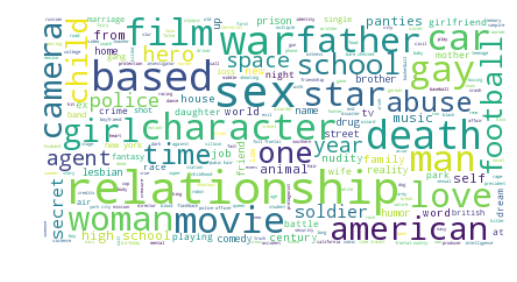

In [29]:
plt.imshow(cloud_plot_imdb, interpolation='bilinear')
plt.axis("off")
plt.show()

## Plotting word cloud for top grossing

In [30]:
df_plot_gross= df_plot.groupby('plot_keyword')['gross'].agg(['mean',len]).reset_index()
df_plot_gross_sort20= df_plot_gross[df_plot_gross['len']>1.0]
df_plot_gross_sort20=df_plot_gross_sort20.sort_values(by='mean', ascending=False)

C:\Users\dhruv\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:372: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


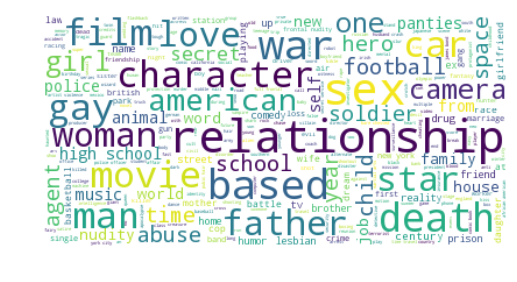

In [31]:
sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text = " ".join(str(e) for e in df_plot_gross_sort20['plot_keyword'].values.tolist()) 
cloud_plot_gross = WordCloud(background_color='white',mask=color_mask,max_words=2000,max_font_size=40,stopwords=sWords)
cloud_plot_gross.generate(cut_text) 
plt.imshow(cloud_plot_gross, interpolation='bilinear')
plt.axis("off")
plt.show()

## Plotting for top budget

In [32]:
df_plot_budget= df_plot.groupby('plot_keyword')['budget'].agg(['mean',len]).reset_index()
df_plot_budget_sort20= df_plot_budget[df_plot_budget['len']>1.0]
df_plot_budget_sort20=df_plot_budget_sort20.sort_values(by='mean', ascending=False)

C:\Users\dhruv\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:372: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


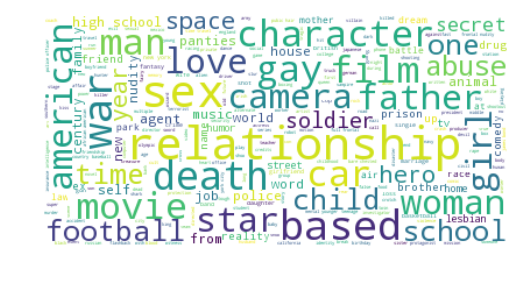

In [33]:
sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text = " ".join(str(e) for e in df_plot_budget_sort20['plot_keyword'].values.tolist()) 
cloud_plot_budget = WordCloud(background_color='white',mask=color_mask,max_words=2000,max_font_size=40,stopwords=sWords)
cloud_plot_budget.generate(cut_text) 
plt.imshow(cloud_plot_budget, interpolation='bilinear')
plt.axis("off")
plt.show()

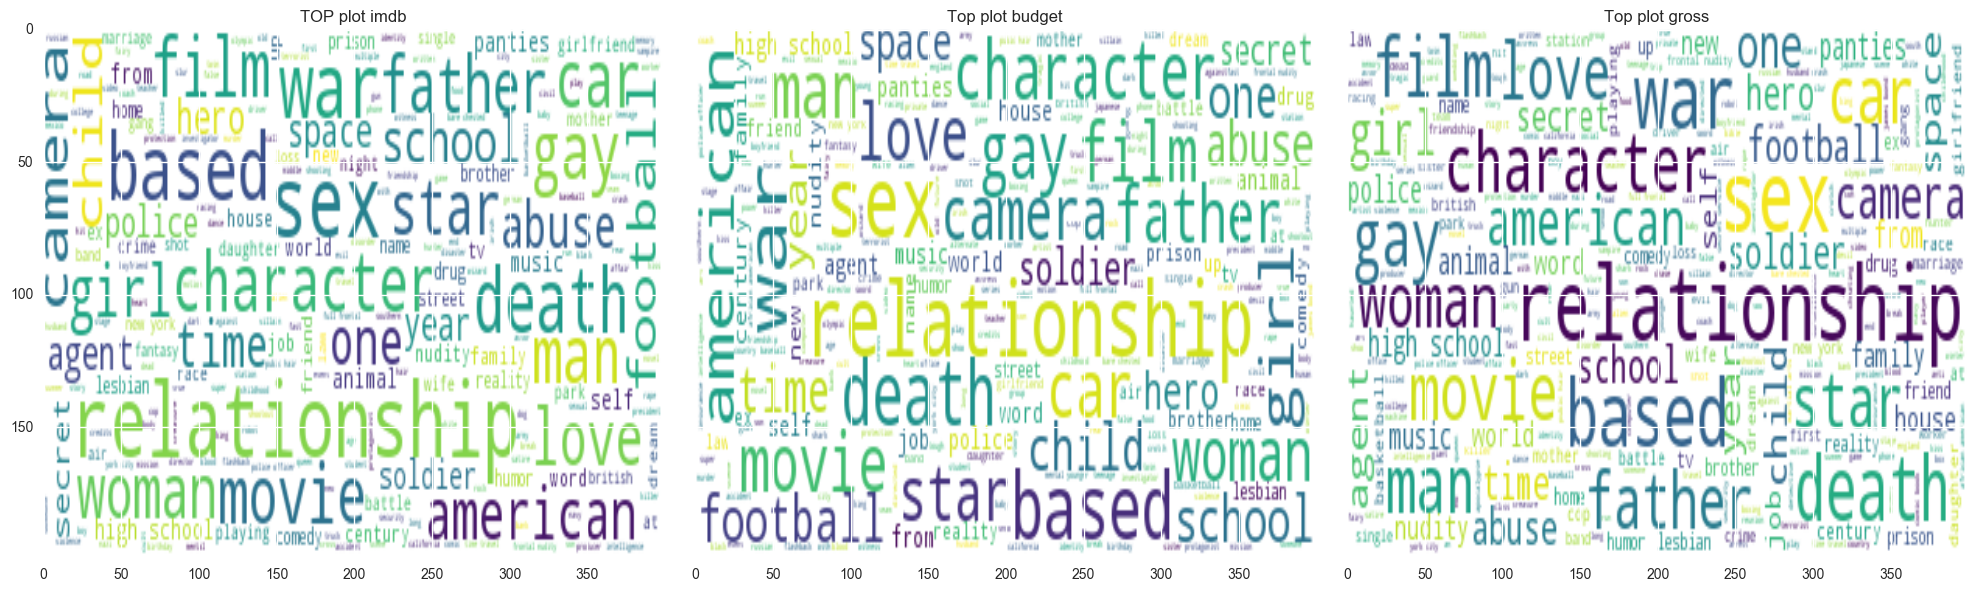

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(1,3 , sharey=True, figsize=(20, 6))
ax1.imshow(cloud_plot_imdb, aspect='auto')
ax1.set_title('TOP plot imdb')
ax2.imshow(cloud_plot_budget, aspect='auto')
ax2.set_title('Top plot budget')
ax3.imshow(cloud_plot_gross, aspect='auto')
ax3.set_title('Top plot gross')
plt.tight_layout()

## The common word which we can see amongst all the three word cloud are relationhip, sex, girl, death, war, american, movie, character etc

In [35]:
df_clean2 = df_genre[['genre', 'cgenres', 'budget', 'gross', 'year', 'actors','director_name','imdb_score','net','net_percentage','movie_title',
                                  'plot_keywords']].dropna()
df_genre_plot = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'gross', 'year', 'actors','director_name','imdb_score','net','net_percentage','movie_title',
                                  'plot_keyword','cplotkeyword'])

def genrePlotRemap(row):
    global df_genre_plot
    d = {}
    plot_keywords = np.array(row['plot_keywords'].split('|'))
    n = plot_keywords.size
    d['actors']= [row['actors']]*n
    d['genre']= [row['genre']]*n
    d['cgenres']= [row['cgenres']]*n
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['year'] = [row['year']]*n
    d['director_name']= [row['director_name']]*n
    d['imdb_score']=[row['imdb_score']]*n
    d['net']= [row['net']]*n
    d['net_percentage']= [row['net_percentage']]*n
    d['movie_title']= [row['movie_title']]*n
    d['plot_keyword'], d['cplotkeyword'] = [], []
    for plot_keyword in plot_keywords:
        d['plot_keyword'].append(plot_keyword)
        d['cplotkeyword'].append(plot_keywords[plot_keywords != plot_keyword])
    df_genre_plot = df_genre_plot.append(pd.DataFrame(d), ignore_index = True)

df_clean2.apply(genrePlotRemap, axis = 1)
df_genre_plot['year'] = df_genre_plot['year'].astype(np.int16)
df_genre_plot = df_genre_plot[['plot_keyword','cplotkeyword','genre','cgenres', 'budget', 'gross', 'year', 'cgenres','actors','director_name','imdb_score','net','net_percentage','movie_title']]

In [89]:
# df_genre_plot.head()

## FOr the 5 genre (Action, Thriller, ROmance, Drama and Comedy) we will find out which plot keywords have been used most of the times.


In [37]:
df_genre_plot_sorted= df_genre_plot[(df_genre_plot['genre']=='Drama')|(df_genre_plot['genre']=='Comedy')|(df_genre_plot['genre']=='Thriller')
                         |(df_genre_plot['genre']=='Action')|(df_genre_plot['genre']=='Romance')]

In [38]:
df_genre_plot_action= df_genre_plot_sorted[(df_genre_plot_sorted['genre']=='Action')]

In [39]:
df_genre_plot_action_count= df_genre_plot_action[['genre','plot_keyword','movie_title']]

In [40]:
df_genre_plot_action_count= df_genre_plot_action_count.groupby(['genre','plot_keyword'])['movie_title'].count().reset_index()

In [41]:
df_genre_plot_action_count=df_genre_plot_action_count.sort_values(by='movie_title', ascending=False)

In [42]:
df_genre_plot_action_count.head()

genre plot_keyword  movie_title
1528  Action       police           46
1341  Action       murder           37
57    Action        alien           35
212   Action       battle           32
744   Action          fbi           31

In [47]:
kw_grosses_action = defaultdict(list)
for keywords, gross in zip(df_genre_plot_action.plot_keyword.values, df_genre_plot_action.gross.values):
        kw_grosses_action[keywords].append(gross)
        
kw_gross_stats_action = {}
for word, grosses in kw_grosses_action.items():
    if len(grosses)<10:
        continue
    kw_gross_stats_action[word] = {
            'mean': mean(grosses),
            'min': min(grosses),
            'max': max(grosses)
            }

In [60]:
def plot_chart(chart, title):
    
    plt.clf()
    xs = [a[1]['mean'] for a in chart]
    ys = np.arange(len(chart), 0, -1)
    xmins_err = [a[1]['mean']-a[1]['min'] for a in chart]
    xmaxs_err = [a[1]['max']-a[1]['mean'] for a in chart]
    plt.errorbar(xs, ys, xerr=[xmins_err, xmaxs_err], fmt='o')
    kws = [a[0] for a in chart]
    plt.yticks(ys, kws, fontsize=14)
    left, right, bottom, top = plt.axis()
    plt.axis((left, right, bottom, top+1))
    plt.title(title, fontsize=18)
    plt.xlabel('mean net')
    plt.ylabel('keywords')
    plt.show()

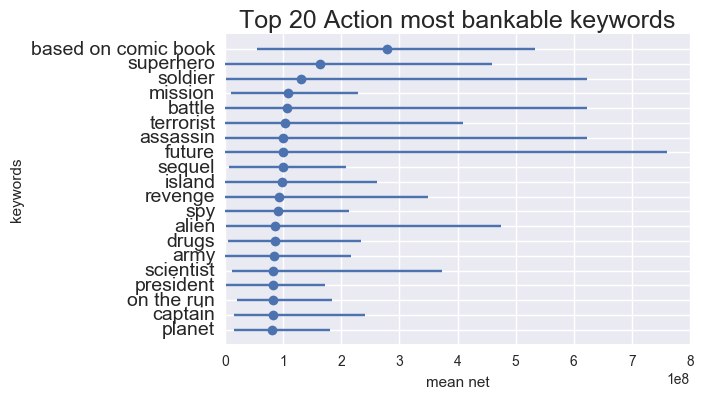

In [61]:
chart_most_bankable_action = sorted(kw_gross_stats_action.items(), key=lambda a:a[1]['mean'], reverse=True)[:20]
plot_chart(chart_most_bankable_action, 'Top 20 Action most bankable keywords')

## Based on comic book is the most used action plot keyword

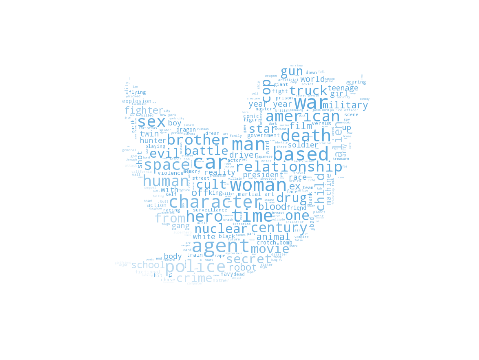

In [62]:
color_mask_action = imread(path+'/twitter12.jpg') 
image_colors = ImageColorGenerator(color_mask_action)

sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text = " ".join(str(e) for e in df_genre_plot_action_count['plot_keyword'].values.tolist()) 
cloud_plot_action = WordCloud(background_color='white',mask=color_mask_action,max_words=2000,max_font_size=50,stopwords=sWords)
cloud_plot_action.generate(cut_text) 
plt.imshow(cloud_plot_action.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

## Romance vs Keyword word Cloud

In [63]:
df_genre_plot_romance= df_genre_plot_sorted[(df_genre_plot_sorted['genre']=='Romance')]
df_genre_plot_romance_count= df_genre_plot_romance[['genre','plot_keyword','movie_title']]
df_genre_plot_romance_count= df_genre_plot_romance_count.groupby(['genre','plot_keyword'])['movie_title'].count().reset_index()
df_genre_plot_romance_count=df_genre_plot_romance_count.sort_values(by='movie_title', ascending=False)
df_genre_plot_romance_count_best= df_genre_plot_romance_count.head()

In [64]:
df_genre_plot_romance.head()

plot_keyword                              cplotkeyword    genre  \
85      sandman    [spider man, symbiote, venom, villain]  Romance   
86   spider man       [sandman, symbiote, venom, villain]  Romance   
87     symbiote     [sandman, spider man, venom, villain]  Romance   
88        venom  [sandman, spider man, symbiote, villain]  Romance   
89      villain    [sandman, spider man, symbiote, venom]  Romance   

                cgenres       budget        gross  year              cgenres  \
85  [Action, Adventure]  258000000.0  336530303.0  2007  [Action, Adventure]   
86  [Action, Adventure]  258000000.0  336530303.0  2007  [Action, Adventure]   
87  [Action, Adventure]  258000000.0  336530303.0  2007  [Action, Adventure]   
88  [Action, Adventure]  258000000.0  336530303.0  2007  [Action, Adventure]   
89  [Action, Adventure]  258000000.0  336530303.0  2007  [Action, Adventure]   

                                     actors director_name  imdb_score  \
85  J.K. Simmons,James Franco,Kirsten Dunst     Sam Raimi         6.2   
86  J.K. Simmons,James Franco,Kirsten Dunst     Sam Raimi         6.2   
87  J.K. Simmons,James Franco,Kirsten Dunst     Sam Raimi         6.2   
88  J.K. Simmons,James Franco,Kirsten Dunst     Sam Raimi         6.2   
89  J.K. Simmons,James Franco,Kirsten Dunst     Sam Raimi         6.2   

           net  net_percentage    movie_title  
85  78530303.0       30.438102  Spider-Man 3   
86  78530303.0       30.438102  Spider-Man 3   
87  78530303.0       30.438102  Spider-Man 3   
88  78530303.0       30.438102  Spider-Man 3   
89  78530303.0       30.438102  Spider-Man 3

In [65]:
from collections import defaultdict

In [66]:
kw_grosses_romance = defaultdict(list)
for keywords, gross in zip(df_genre_plot_romance.plot_keyword.values, df_genre_plot_romance.gross.values):
        kw_grosses_romance[keywords].append(gross)
        
kw_gross_stats_romance = {}
for word, grosses in kw_grosses_romance.items():
    if len(grosses)<10:
        continue
    kw_gross_stats_romance[word] = {
            'mean': mean(grosses),
            'min': min(grosses),
            'max': max(grosses)
            }

In [67]:
def plot_chart(chart, title):
    plt.clf()
    xs = [a[1]['mean'] for a in chart]
    ys = np.arange(len(chart), 0, -1)
    xmins_err = [a[1]['mean']-a[1]['min'] for a in chart]
    xmaxs_err = [a[1]['max']-a[1]['mean'] for a in chart]
    plt.errorbar(xs, ys, xerr=[xmins_err, xmaxs_err], fmt='o')
    kws = [a[0] for a in chart]
    plt.yticks(ys, kws, fontsize=14)
    left, right, bottom, top = plt.axis()
    plt.axis((left, right, bottom, top+1))
    
    plt.title(title, fontsize=18)
    plt.show()

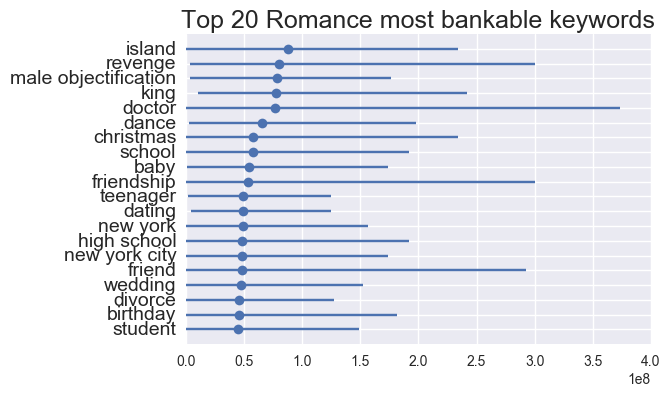

In [68]:
chart_most_bankable_romance = sorted(kw_gross_stats_romance.items(), key=lambda a:a[1]['mean'], reverse=True)[:20]
plot_chart(chart_most_bankable_romance, 'Top 20 Romance most bankable keywords')

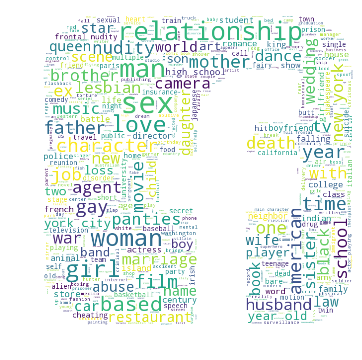

In [69]:
color_mask = imread(path+'/facebook.jpg') 

sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text = " ".join(str(e) for e in df_genre_plot_romance_count['plot_keyword'].values.tolist()) 
cloud_plot_romance = WordCloud(background_color='white',mask=color_mask,max_words=2000,max_font_size=60,stopwords=sWords)
cloud_plot_romance.generate(cut_text) 
plt.imshow(cloud_plot_romance, interpolation='bilinear')
plt.axis("off")
plt.show()

## Thriller vs Keyword word cloud

In [70]:
df_genre_plot_thriller= df_genre_plot_sorted[(df_genre_plot_sorted['genre']=='Thriller')]
df_genre_plot_thriller_count= df_genre_plot_thriller[['genre','plot_keyword','movie_title']]
df_genre_plot_thriller_count= df_genre_plot_thriller_count.groupby(['genre','plot_keyword'])['movie_title'].count().reset_index()
df_genre_plot_thriller_count=df_genre_plot_thriller_count.sort_values(by='movie_title', ascending=False)
df_genre_plot_thriller_count_best= df_genre_plot_romance_count.head()

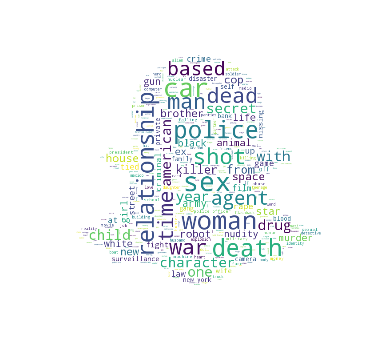

In [71]:
color_mask = imread(path+'/snapchat.jpg') 

sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text = " ".join(str(e) for e in df_genre_plot_thriller_count['plot_keyword'].values.tolist()) 
cloud_plot_thriller = WordCloud(background_color='white',mask=color_mask,max_words=2000,max_font_size=60,stopwords=sWords)
cloud_plot_thriller.generate(cut_text) 
plt.imshow(cloud_plot_thriller, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
kw_grosses_thriller = defaultdict(list)
for keywords, gross in zip(df_genre_plot_thriller.plot_keyword.values, df_genre_plot_thriller.gross.values):
        kw_grosses_thriller[keywords].append(gross)
        
kw_gross_stats_thriller = {}
for word, grosses in kw_grosses_thriller.items():
    if len(grosses)<10:
        continue
    kw_gross_stats_thriller[word] = {
            'mean': mean(grosses),
            'min': min(grosses),
            'max': max(grosses)
            }

In [73]:
def plot_chart(chart, title):
    plt.clf()
    xs = [a[1]['mean'] for a in chart]
    ys = np.arange(len(chart), 0, -1)
    xmins_err = [a[1]['mean']-a[1]['min'] for a in chart]
    xmaxs_err = [a[1]['max']-a[1]['mean'] for a in chart]
    plt.errorbar(xs, ys, xerr=[xmins_err, xmaxs_err], fmt='o')
    kws = [a[0] for a in chart]
    plt.yticks(ys, kws, fontsize=14)
    left, right, bottom, top = plt.axis()
    plt.axis((left, right, bottom, top+1))
    plt.title(title, fontsize=18)
    plt.show()

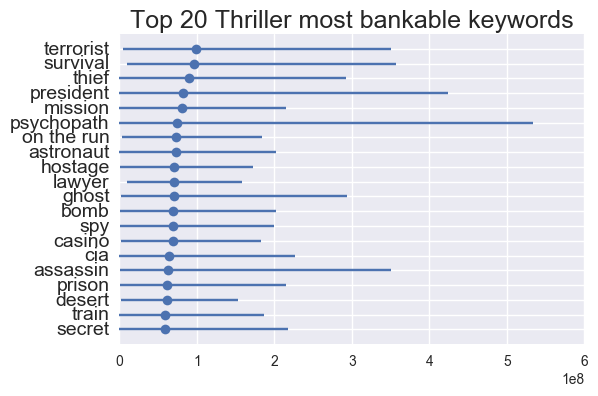

In [74]:
chart_most_bankable_thriller = sorted(kw_gross_stats_thriller.items(), key=lambda a:a[1]['mean'], reverse=True)[:20]
plot_chart(chart_most_bankable_thriller, 'Top 20 Thriller most bankable keywords')

## Drama vs word cloud

In [75]:
df_genre_plot_drama= df_genre_plot_sorted[(df_genre_plot_sorted['genre']=='Drama')]
df_genre_plot_drama_count= df_genre_plot_drama[['genre','plot_keyword','movie_title']]
df_genre_plot_drama_count= df_genre_plot_drama_count.groupby(['genre','plot_keyword'])['movie_title'].count().reset_index()
df_genre_plot_drama_count=df_genre_plot_drama_count.sort_values(by='movie_title', ascending=False)
df_genre_plot_drama_count_best= df_genre_plot_drama_count.head()

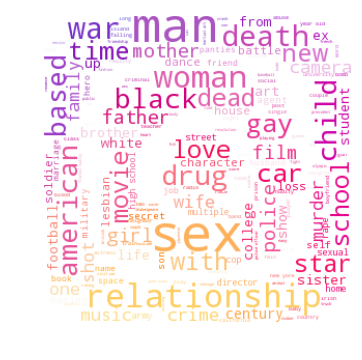

In [76]:
color_mask_drama = imread(path+'/insta.jpg') 
image_colors = ImageColorGenerator(color_mask_drama)
sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text = " ".join(str(e) for e in df_genre_plot_drama_count['plot_keyword'].values.tolist()) 
cloud_plot_drama = WordCloud(background_color='white',mask=color_mask_drama,max_words=2000,max_font_size=60,stopwords=sWords)
cloud_plot_drama.generate(cut_text) 
plt.imshow(cloud_plot_drama.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

In [77]:
kw_grosses_drama = defaultdict(list)
for keywords, gross in zip(df_genre_plot_drama.plot_keyword.values, df_genre_plot_drama.gross.values):
        kw_grosses_drama[keywords].append(gross)
        
kw_gross_stats_drama = {}
for word, grosses in kw_grosses_drama.items():
    if len(grosses)<10:
        continue
    kw_gross_stats_drama[word] = {
            'mean': mean(grosses),
            'min': min(grosses),
            'max': max(grosses)
            }

In [78]:
def plot_chart(chart, title):
    plt.clf()
    xs = [a[1]['mean'] for a in chart]
    ys = np.arange(len(chart), 0, -1)
    xmins_err = [a[1]['mean']-a[1]['min'] for a in chart]
    xmaxs_err = [a[1]['max']-a[1]['mean'] for a in chart]
    plt.errorbar(xs, ys, xerr=[xmins_err, xmaxs_err], fmt='o')
    kws = [a[0] for a in chart]
    plt.yticks(ys, kws, fontsize=14)
    left, right, bottom, top = plt.axis()
    plt.axis((left, right, bottom, top+1))
    plt.title(title, fontsize=18)
    plt.show()

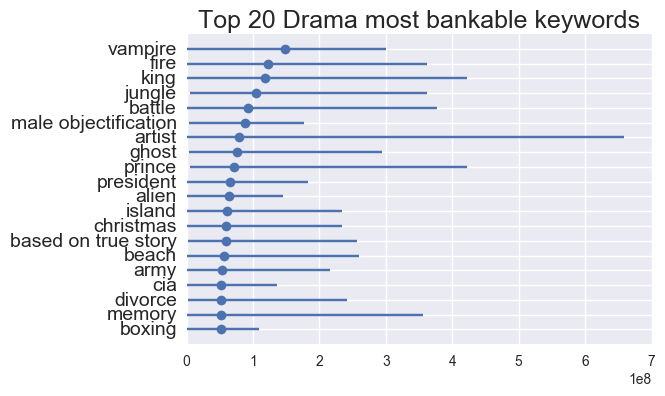

In [79]:
chart_most_bankable_drama = sorted(kw_gross_stats_drama.items(), key=lambda a:a[1]['mean'], reverse=True)[:20]
plot_chart(chart_most_bankable_drama, 'Top 20 Drama most bankable keywords')

## Comedy vs Plot keywords

In [80]:
df_genre_plot_comedy= df_genre_plot_sorted[(df_genre_plot_sorted['genre']=='Comedy')]
df_genre_plot_comedy_count= df_genre_plot_comedy[['genre','plot_keyword','movie_title']]
df_genre_plot_comedy_count= df_genre_plot_comedy_count.groupby(['genre','plot_keyword'])['movie_title'].count().reset_index()
df_genre_plot_comedy_count=df_genre_plot_comedy_count.sort_values(by='movie_title', ascending=False)
df_genre_plot_comedy_count_best= df_genre_plot_comedy_count.head()

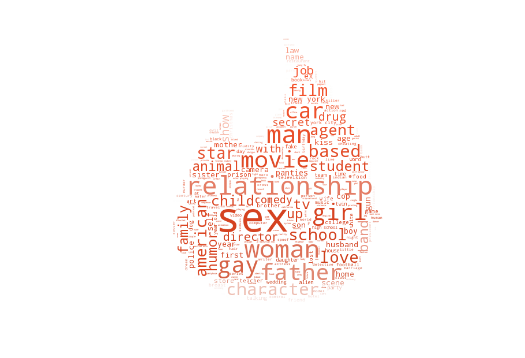

In [81]:
color_mask_comedy = imread(path+'/tinder.jpg') 
image_colors = ImageColorGenerator(color_mask_comedy)
sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
cut_text = " ".join(str(e) for e in df_genre_plot_comedy_count['plot_keyword'].values.tolist()) 
cloud_plot_comedy = WordCloud(background_color='white',mask=color_mask_comedy,max_words=2000,max_font_size=70,stopwords=sWords)
cloud_plot_comedy.generate(cut_text) 
plt.imshow(cloud_plot_comedy.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

In [82]:
kw_grosses_comedy = defaultdict(list)
for keywords, gross in zip(df_genre_plot_comedy.plot_keyword.values, df_genre_plot_comedy.gross.values):
        kw_grosses_comedy[keywords].append(gross)
        
kw_gross_stats_comedy = {}
for word, grosses in kw_grosses_comedy.items():
    if len(grosses)<10:
        continue
    kw_gross_stats_comedy[word] = {
            'mean': mean(grosses),
            'min': min(grosses),
            'max': max(grosses)
            }

In [83]:
def plot_chart(chart, title):
    plt.clf()
    xs = [a[1]['mean'] for a in chart]
    ys = np.arange(len(chart), 0, -1)
    xmins_err = [a[1]['mean']-a[1]['min'] for a in chart]
    xmaxs_err = [a[1]['max']-a[1]['mean'] for a in chart]
    plt.errorbar(xs, ys, xerr=[xmins_err, xmaxs_err], fmt='o')
    kws = [a[0] for a in chart]
    plt.yticks(ys, kws, fontsize=14)
    left, right, bottom, top = plt.axis()
    plt.axis((left, right, bottom, top+1))
    plt.title(title, fontsize=18)
    plt.show()

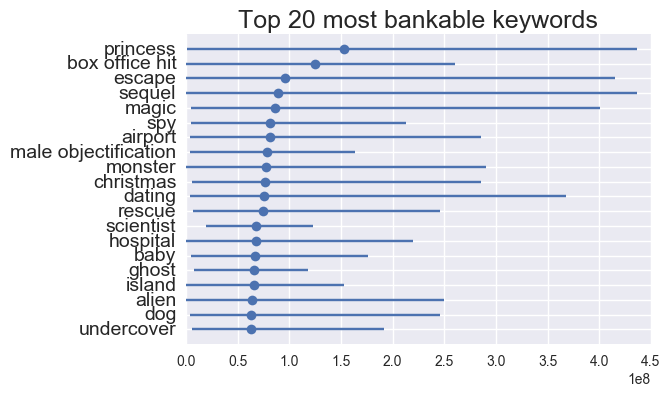

In [84]:
chart_most_bankable_comedy = sorted(kw_gross_stats_comedy.items(), key=lambda t:t[1]['mean'], reverse=True)[:20]
plot_chart(chart_most_bankable_comedy, 'Top 20 most bankable keywords')

In [85]:
from matplotlib import *
import sys
from pylab import *

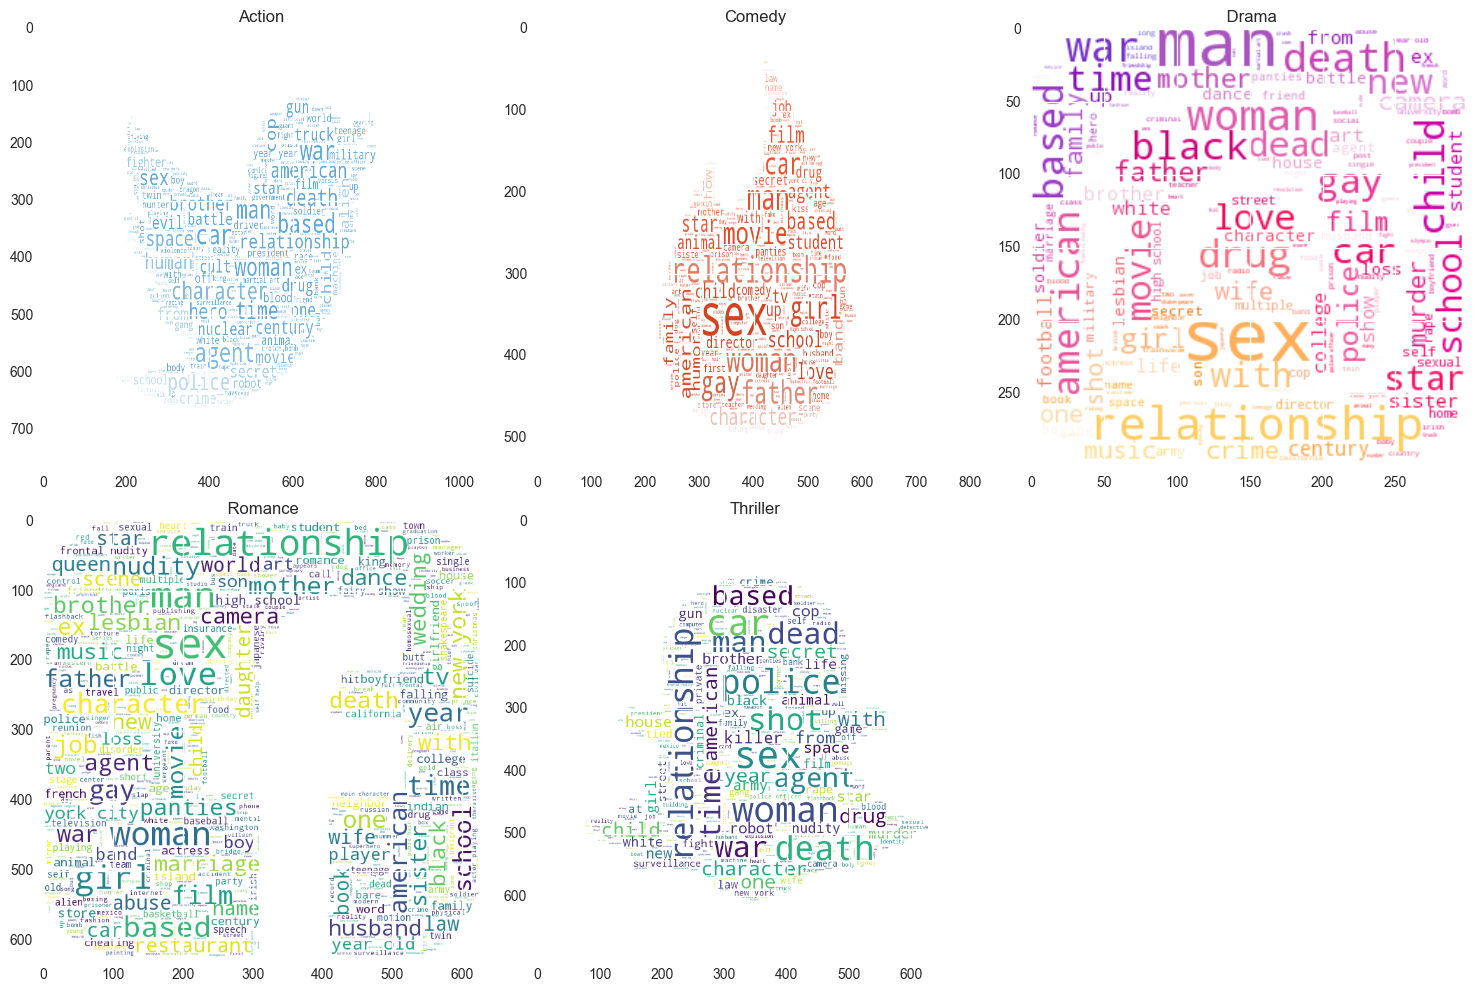

In [86]:
fig = plt.figure()

ax1 = fig.add_subplot(231)
ax1.imshow(cloud_plot_action, aspect='auto')
ax1.set_title('Action')


ax2 = fig.add_subplot(232)
ax2.imshow(cloud_plot_comedy, aspect='auto')
ax2.set_title('Comedy')

ax3 = fig.add_subplot(233)
ax3.imshow(cloud_plot_drama, aspect='auto')
ax3.set_title(' Drama')

ax4 = fig.add_subplot(234)
ax4.imshow(cloud_plot_romance, aspect='auto')
ax4.set_title(' Romance')

ax5 = fig.add_subplot(235)
ax5.imshow(cloud_plot_thriller, aspect='auto')
ax5.set_title('Thriller')

fig.set_figheight(10)
fig.set_figwidth(15)
fig = plt.gcf()
plt.tight_layout()

## Sex, relationship, star, school, woman, death, war, abuse are few of the most common plot keywords

In [87]:
df_plot.to_csv('genre_sorted.csv', sep=',')